<a href="https://colab.research.google.com/github/xfil/IHMT-PythonCourse-2024/blob/main/Anopheles_Meigen_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estudo sobre a ocorrência de *Anopheles* Meigen no Brasil**

Neste trabalho tivemos o objetivo de estudar a presença de mosquitos do género *Anopheles* no Brasil e nos seus diferentes Estados, e relacionar o número de ocorrências das diferentes espécies na base de dados gbif com o número de casos de Malária nesses mesmos Estados.
Adicionalmente verificámos o número de ocorrências por ano para as diferentes espécies de *Anopheles* e criámos um mapa ilustrativo da distribuição das ocorrências por cada um dos estados brasileiros.
Por fim, a título de curiosidade, criámos uma função que permite obter o número de sequências de cada espécie no NCBI.

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Esta imagem é representativa do sub-género de Anopheles Meigen


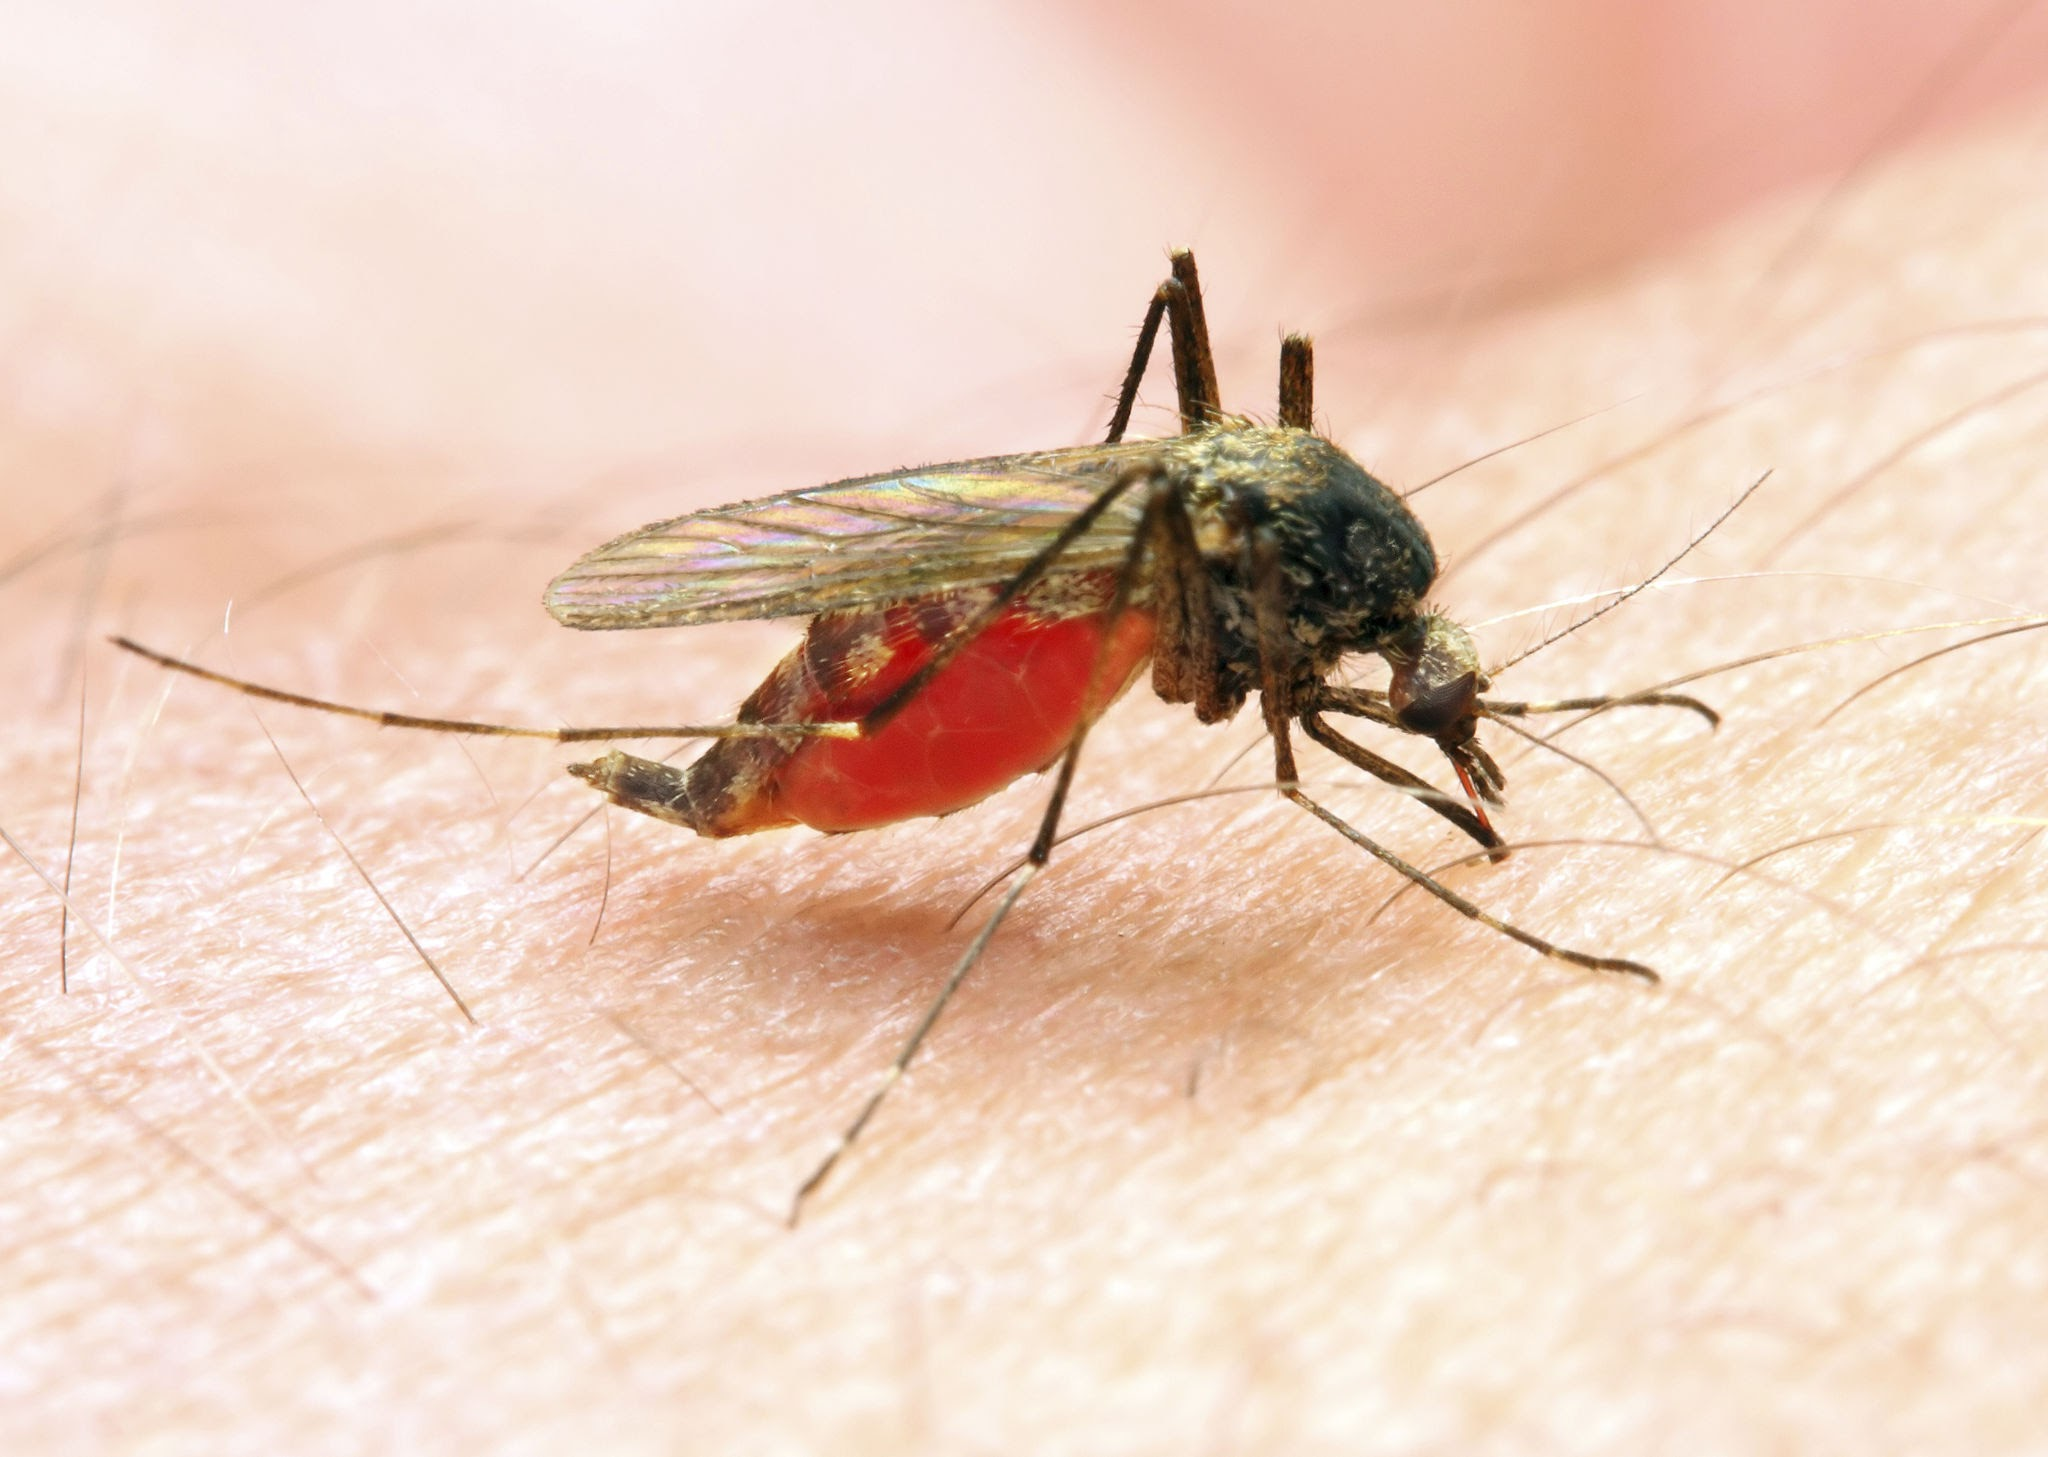

In [113]:
#Imagem ilustrativa de Anopheles

from IPython.display import Image
print(f" Esta imagem é representativa do sub-género de Anopheles Meigen")
Image(filename='/content/drive/MyDrive/python/anopheles mosquito.jpeg')


In [114]:
#Instalações necessárias
!pip install geopandas folium
!pip install pygbif
!pip install geojson
!pip install biopython

In [115]:
#Imports necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import pygbif
from pygbif import species as species
from pygbif import occurrences as occ
import geojson
from Bio import Entrez
from Bio import SeqIO
from itertools import count

In [116]:
#Retorna o número de identificação do género Anopheles no gbif
genero = ['Anopheles Meigen']
keys = [species.name_backbone(x)['usageKey'] for x in genero]
print(f"O código de identificação de {genero[0]} é {keys[0]}.")

O código de identificação de Anopheles Meigen é 1650098.


In [117]:
#Retorna o número total de ocorrências de Anopheles no gbif
occW = [occ.search(taxonKey = x, limit=1000)['count'] for x in keys]
print(f"O número de ocorrências de {genero[0]} é de {occW[0]}.")

O número de ocorrências de Anopheles Meigen é de 572172.


In [118]:
#Criação de uma lista (anophelesDF) com DataFrames que incluem todas as ocorrências de Anopheles no Brasil entre 1970 e 2018 com coordenadas associadas
keep_going = True
index = 0
lim = 300
anophelesBRDF = []
while keep_going:
    res2 = occ.search(taxonKey = 1650098,
                country = 'BR',          #Seleciona apenas as ocorrências no Brasil
                year = "1970,2018",          #Seleciona apenas as ocorrências entre 1970 e 2018
                hasCoordinate = True,          #Seleciona apenas as ocorrências com coordenadas associadas
                offset = index,
                limit = lim)
    count = res2['count']
    index = index + lim
    obs2_df = pd.DataFrame.from_records(res2['results'])
    anophelesBRDF.append(obs2_df)          #Adiciona à lista anophelesBRDF os DataFrames com os conjuntos de 300 ocorrências encontradas
    if index >= int(count):
        keep_going = False


In [147]:
#Transforma a lista de DataFrames (anophelesBRDF) em uma única DataFrame com todos os dados (anophelesDF)
anophelesDF = pd.concat(anophelesBRDF)
anophelesDF

key                            datasetKey  \
0    3710565314  1412d4de-9982-4f96-8393-3dc9fe1df74f   
1    3710565313  1412d4de-9982-4f96-8393-3dc9fe1df74f   
2    3710565311  1412d4de-9982-4f96-8393-3dc9fe1df74f   
3    3710565309  1412d4de-9982-4f96-8393-3dc9fe1df74f   
4    3442450304  040c5662-da76-4782-a48e-cdea1892d14c   
..          ...                                   ...   
144   177071281  88e38292-f762-11e1-a439-00145eb45e9a   
145   177071282  88e38292-f762-11e1-a439-00145eb45e9a   
146   225879563  88e38292-f762-11e1-a439-00145eb45e9a   
147   225879564  88e38292-f762-11e1-a439-00145eb45e9a   
148   177069716  88e38292-f762-11e1-a439-00145eb45e9a   

                         publishingOrgKey  \
0    c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b   
1    c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b   
2    c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b   
3    c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b   
4    b3bf3a83-1f68-4541-a03f-330d30d567f5   
..                                    ...   
144  5ab24120-de25-11dc-9a41-b8a03c50a862   
145  5ab24120-de25-11dc-9a41-b8a03c50a862   
146  5ab24120-de25-11dc-9a41-b8a03c50a862   
147  5ab24120-de25-11dc-9a41-b8a03c50a862   
148  5ab24120-de25-11dc-9a41-b8a03c50a862   

                          installationKey  \
0    ada4205f-679c-4a86-9759-ff652ac467b3   
1    ada4205f-679c-4a86-9759-ff652ac467b3   
2    ada4205f-679c-4a86-9759-ff652ac467b3   
3    ada4205f-679c-4a86-9759-ff652ac467b3   
4    fb5e4c2a-579c-434b-a446-3a665dd732ad   
..                                    ...   
144  6020066e-f762-11e1-a439-00145eb45e9a   
145  6020066e-f762-11e1-a439-00145eb45e9a   
146  6020066e-f762-11e1-a439-00145eb45e9a   
147  6020066e-f762-11e1-a439-00145eb45e9a   
148  6020066e-f762-11e1-a439-00145eb45e9a   

                   hostingOrganizationKey publishingCountry     protocol  \
0    c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b                BR          EML   
1    c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b                BR          EML   
2    c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b                BR          EML   
3    c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b                BR          EML   
4    fbca90e3-8aed-48b1-84e3-369afbd000ce                ZZ  DWC_ARCHIVE   
..                                    ...               ...          ...   
144  5ab24120-de25-11dc-9a41-b8a03c50a862                US  DWC_ARCHIVE   
145  5ab24120-de25-11dc-9a41-b8a03c50a862                US  DWC_ARCHIVE   
146  5ab24120-de25-11dc-9a41-b8a03c50a862                US  DWC_ARCHIVE   
147  5ab24120-de25-11dc-9a41-b8a03c50a862                US  DWC_ARCHIVE   
148  5ab24120-de25-11dc-9a41-b8a03c50a862                US  DWC_ARCHIVE   

                       lastCrawled                     lastParsed  crawlId  \
0    2024-07-03T22:10:10.069+00:00  2024-07-03T22:10:25.156+00:00      583   
1    2024-07-03T22:10:10.069+00:00  2024-07-03T22:10:24.979+00:00      583   
2    2024-07-03T22:10:10.069+00:00  2024-07-03T22:10:24.850+00:00      583   
3    2024-07-03T22:10:10.069+00:00  2024-07-03T22:10:24.853+00:00      583   
4    2024-07-07T19:41:26.940+00:00  2024-07-07T21:13:00.022+00:00      353   
..                             ...                            ...      ...   
144  2024-07-09T05:10:14.207+00:00  2024-07-09T05:14:41.732+00:00      306   
145  2024-07-09T05:10:14.207+00:00  2024-07-09T05:14:41.938+00:00      306   
146  2024-07-09T05:10:14.207+00:00  2024-07-09T05:14:44.987+00:00      306   
147  2024-07-09T05:10:14.207+00:00  2024-07-09T05:14:44.994+00:00      306   
148  2024-07-09T05:10:14.207+00:00  2024-07-09T05:14:41.712+00:00      306   

     ... elevationAccuracy locationRemarks otherCatalogNumbers  \
0    ...               NaN             NaN                 NaN   
1    ...               NaN             NaN                 NaN   
2    ...               NaN             NaN                 NaN   
3    ...               NaN             NaN                 NaN   
4    ...               NaN             NaN                 NaN   

In [120]:
#Retorna o número de ocorrências de Anopheles por continente
outW = occ.search(taxonKey = 1650098, limit = 1000)
anophelesW = pd.DataFrame.from_dict(outW["results"]) #Apenas os primeiros 300 registos
anophelesW["continent"].value_counts()

continent
SOUTH_AMERICA    123
NORTH_AMERICA    122
EUROPE            36
OCEANIA            8
ASIA               7
AFRICA             2
Name: count, dtype: int64

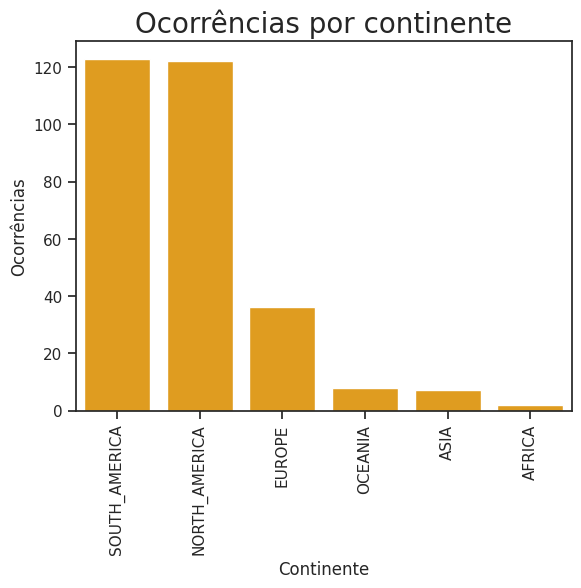

In [121]:
#Realização de um gráfico de número de ocorrências registadas de Anopheles por continente
#Adicionar a coluna Count (número de ocorrências)
anophelesWCount = pd.DataFrame(anophelesW.groupby("continent").size(), columns = ["Count"])
#Ordenar por ordem decrescente
anophelesWCount = anophelesWCount.sort_values(by = "Count", ascending = False)
#Gráfico de barras
Cont_contagem = sns.barplot(x = 'continent', y = 'Count',
              data = anophelesWCount,
              color = 'orange')
#Nomear os eixos X e Y
Cont_contagem.set(xlabel = 'Continente', ylabel = 'Ocorrências')
#Rotação dos nomes do eixo do X
Cont_contagem.xaxis.set_tick_params(rotation=90)
#Adicionar título
plt.title("Ocorrências por continente no gbif", fontsize=20)
plt.show()

In [122]:
#Retorna os 5 primeiros valores no DataFrame
anophelesDF.head()

key                            datasetKey  \
0  3710565314  1412d4de-9982-4f96-8393-3dc9fe1df74f   
1  3710565313  1412d4de-9982-4f96-8393-3dc9fe1df74f   
2  3710565311  1412d4de-9982-4f96-8393-3dc9fe1df74f   
3  3710565309  1412d4de-9982-4f96-8393-3dc9fe1df74f   
4  3442450304  040c5662-da76-4782-a48e-cdea1892d14c   

                       publishingOrgKey                       installationKey  \
0  c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b  ada4205f-679c-4a86-9759-ff652ac467b3   
1  c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b  ada4205f-679c-4a86-9759-ff652ac467b3   
2  c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b  ada4205f-679c-4a86-9759-ff652ac467b3   
3  c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b  ada4205f-679c-4a86-9759-ff652ac467b3   
4  b3bf3a83-1f68-4541-a03f-330d30d567f5  fb5e4c2a-579c-434b-a446-3a665dd732ad   

                 hostingOrganizationKey publishingCountry     protocol  \
0  c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b                BR          EML   
1  c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b                BR          EML   
2  c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b                BR          EML   
3  c0d9c91a-0f83-4819-bf7e-bb5e1184eb6b                BR          EML   
4  fbca90e3-8aed-48b1-84e3-369afbd000ce                ZZ  DWC_ARCHIVE   

                     lastCrawled                     lastParsed  crawlId  ...  \
0  2024-07-03T22:10:10.069+00:00  2024-07-03T22:10:25.156+00:00      583  ...   
1  2024-07-03T22:10:10.069+00:00  2024-07-03T22:10:24.979+00:00      583  ...   
2  2024-07-03T22:10:10.069+00:00  2024-07-03T22:10:24.850+00:00      583  ...   
3  2024-07-03T22:10:10.069+00:00  2024-07-03T22:10:24.853+00:00      583  ...   
4  2024-07-07T19:41:26.940+00:00  2024-07-07T21:13:00.022+00:00      353  ...   

  elevationAccuracy locationRemarks otherCatalogNumbers  verbatimTaxonRank  \
0               NaN             NaN                 NaN                NaN   
1               NaN             NaN                 NaN                NaN   
2               NaN             NaN                 NaN                NaN   
3               NaN             NaN                 NaN                NaN   
4               NaN             NaN                 NaN                NaN   

   taxonRemarks  networkKeys  collectionKey  eventID  \
0           NaN          NaN            NaN      NaN   
1           NaN          NaN            NaN      NaN   
2           NaN          NaN            NaN      NaN   
3           NaN          NaN            NaN      NaN   
4           NaN          NaN            NaN      NaN   

   http://unknown.org/subfamily  http://unknown.org/taxonRankID  
0                           NaN                             NaN  
1                           NaN                             NaN  
2                           NaN                             NaN  
3                           NaN                             NaN  
4                           NaN                             NaN  

[5 rows x 124 columns]

In [123]:
#Retorna uma lista com todas as espécies diferentes de Anopheles no Brasil
anophelesDF["species"].unique()

array(['Anopheles tadei', 'Anopheles konderi', nan, 'Anopheles darlingi',
       'Anopheles benarrochi', 'Anopheles costai',
       'Anopheles fluminensis', 'Anopheles triannulatus',
       'Anopheles mattogrossensis', 'Anopheles oswaldoi',
       'Anopheles forattinii', 'Anopheles peryassui',
       'Anopheles malefactor', 'Anopheles albitarsis',
       'Anopheles goeldii', 'Anopheles marajoara',
       'Anopheles nuneztovari', 'Anopheles thomasi', 'Anopheles medialis',
       'Anopheles oryzalimnetes', 'Anopheles neivai',
       'Anopheles argyritarsis', 'Anopheles sawyeri',
       'Anopheles braziliensis', 'Anopheles lepidotus',
       'Anopheles cruzii', 'Anopheles parvus', 'Anopheles strodei',
       'Anopheles deaneorum', 'Anopheles galvaoi', 'Anopheles aquasalis',
       'Anopheles evansae', 'Anopheles rangeli', 'Anopheles pristinus',
       'Anopheles kompi', 'Anopheles janconnae', 'Anopheles antunesi',
       'Anopheles guarani', 'Anopheles arthuri', 'Anopheles lutzii',
      

In [124]:
#Retorna o número de espécies diferentes de Anopheles no Brasil
diversidade = len(anophelesDF["species"].unique())
print(f"O número de espécies diferentes de {genero[0]} no Brasil é de {diversidade}.")

O número de espécies diferentes de Anopheles Meigen no Brasil é de 55.


In [125]:
#Retorna o número de ocorrências de cada espécie de Anopheles no Brasil
anophelesDF["species"].value_counts()

species
Anopheles cruzii             1111
Anopheles triannulatus        711
Anopheles oryzalimnetes       628
Anopheles albitarsis          461
Anopheles oswaldoi            292
Anopheles nuneztovari         219
Anopheles janconnae           192
Anopheles darlingi            170
Anopheles marajoara           131
Anopheles medialis            118
Anopheles evansae              96
Anopheles ininii               89
Anopheles konderi              85
Anopheles deaneorum            72
Anopheles argyritarsis         50
Anopheles aquasalis            41
Anopheles strodei              41
Anopheles costai               31
Anopheles lutzii               29
Anopheles benarrochi           25
Anopheles parvus               24
Anopheles fluminensis          21
Anopheles antunesi             15
Anopheles mediopunctatus       15
Anopheles galvaoi              15
Anopheles bellator             14
Anopheles peryassui            14
Anopheles gambiae              12
Anopheles braziliensis         11
Anophe

<Axes: title={'center': 'Ocorrência de cada espécie'}>

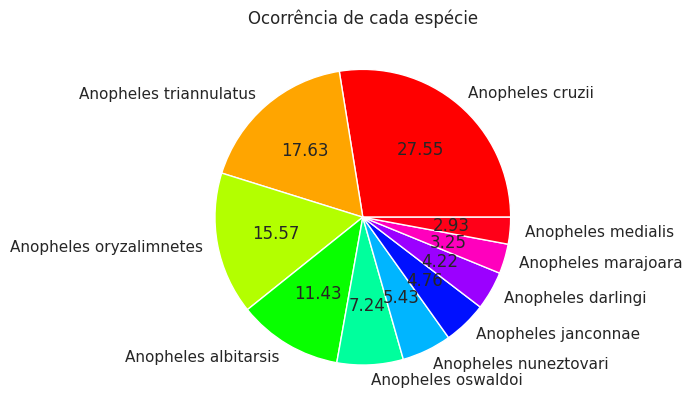

In [126]:
#Realização de um gráfico circular do número de ocorrências de cada espécie (apenas as 10 mais prevalentes)
anophelesDF["species"].value_counts()[:10].plot(kind = "pie",         #Tipo de gráfco
                                                colormap = "hsv",         #Esquema de cores
                                                title = "Ocorrência de cada espécie no gbif",         #Titulo do gráfico
                                                ylabel = "",         #Remover legenda do eixo Y
                                                autopct = '%.2f')         #Adicionar percentagem

In [127]:
#Converter todos os estados para o código UF (unidade federal)
#Criar uma nova coluna
anophelesDF["Estados"] = anophelesDF["stateProvince"]
#Substituir os valores
anophelesDF["Estados"].replace("Amazonas", "Am", inplace=True)
anophelesDF["Estados"].replace("Pará", "Pa", inplace=True)
anophelesDF["Estados"].replace("Amapá", "Ap", inplace=True)
anophelesDF["Estados"].replace("Para", "Pa", inplace=True)
anophelesDF["Estados"].replace("Parana", "Pr", inplace=True)
anophelesDF["Estados"].replace("Rio De Janeiro", "Rj", inplace=True)
anophelesDF["Estados"].replace("Rio de Janeiro", "Rj", inplace=True)
anophelesDF["Estados"].replace("Bahia", "Ba", inplace=True)
anophelesDF["Estados"].replace("Mato Grosso", "Mt", inplace=True)
anophelesDF["Estados"].replace("Roraima", "Rr", inplace=True)
anophelesDF["Estados"].replace("Mato Grosso do Sul", "Ms", inplace=True)
anophelesDF["Estados"].replace("Rondonia", "Ro", inplace=True)
anophelesDF["Estados"].replace("Rondônia", "Ro", inplace=True)
anophelesDF["Estados"].replace("Minas Gerais", "Mg", inplace=True)
anophelesDF["Estados"].replace("Sao Paulo", "Sp", inplace=True)
anophelesDF["Estados"].replace("Acre", "Ac", inplace=True)
anophelesDF["Estados"].replace("Ceara", "Ce", inplace=True)
anophelesDF["Estados"].replace("Espirito Santo", "Es", inplace=True)
anophelesDF["Estados"].replace("Goias", "Go", inplace=True)
anophelesDF["Estados"].replace("Amapa", "Ap", inplace=True)
anophelesDF["Estados"].replace("Rio Grande do Sul", "Rs", inplace=True)
anophelesDF["Estados"].replace("Tocantins", "To", inplace=True)
anophelesDF["Estados"].replace("Maranhao", "Ma", inplace=True)
anophelesDF["Estados"].replace("Piaui", "Pi", inplace=True)
anophelesDF["Estados"].replace("Santa Catarina", "Sc", inplace=True)
anophelesDF["Estados"].replace("Pernambuco", "Pe", inplace=True)
anophelesDF["Estados"].replace("Espírito Santo", "Es", inplace=True)
anophelesDF["Estados"].replace("São Paulo", "Sp", inplace=True)
#Contagem de ocorrências em cada UF
anophelesDF["Estados"].value_counts()

Estados
Pa         1406
Pr         1371
Rj          268
Sp          139
Ro          115
Am          112
Ba          100
Mt           95
Rr           93
Ms           69
Ap           48
Mg           32
Ac           31
Ce           28
Es           23
Go           19
Rs           13
To           10
Ma            8
Pi            7
No data       6
Sc            4
Pe            1
Name: count, dtype: int64

In [128]:
#Ocorrências de Anopheles por estado no Brasil
#Criar uma DataFrame com as colunas Estado e Contagem de ocorrências
state_count = pd.DataFrame(anophelesDF.groupby("Estados").size(), columns=["Ocorrências"])
#Por ordem descendente
state_count_des = state_count.sort_values(by = "Ocorrências", ascending = False)
print(state_count_des)

#Casos de malária por estado no Brasil - Boletim epidemiológico
#Criar uma data frame com as colunas Estado e Contagem de casos
boletim = {'Estados': ['Am', 'Rr', 'Pa', 'Ac', 'Ro', 'Ap', 'Mt', 'Ma'], 'Casos de Malária': [28051,13466,9832, 5548, 4860, 1666, 960, 31]}
boletimDF = pd.DataFrame(boletim)
print(boletimDF)

         Ocorrências
Estados             
Pa              1406
Pr              1371
Rj               268
Sp               139
Ro               115
Am               112
Ba               100
Mt                95
Rr                93
Ms                69
Ap                48
Mg                32
Ac                31
Ce                28
Es                23
Go                19
Rs                13
To                10
Ma                 8
Pi                 7
No data            6
Sc                 4
Pe                 1
  Estados  Casos de Malária
0      Am             28051
1      Rr             13466
2      Pa              9832
3      Ac              5548
4      Ro              4860
5      Ap              1666
6      Mt               960
7      Ma                31


<Axes: title={'center': 'Casos de malária'}, xlabel='Estados'>

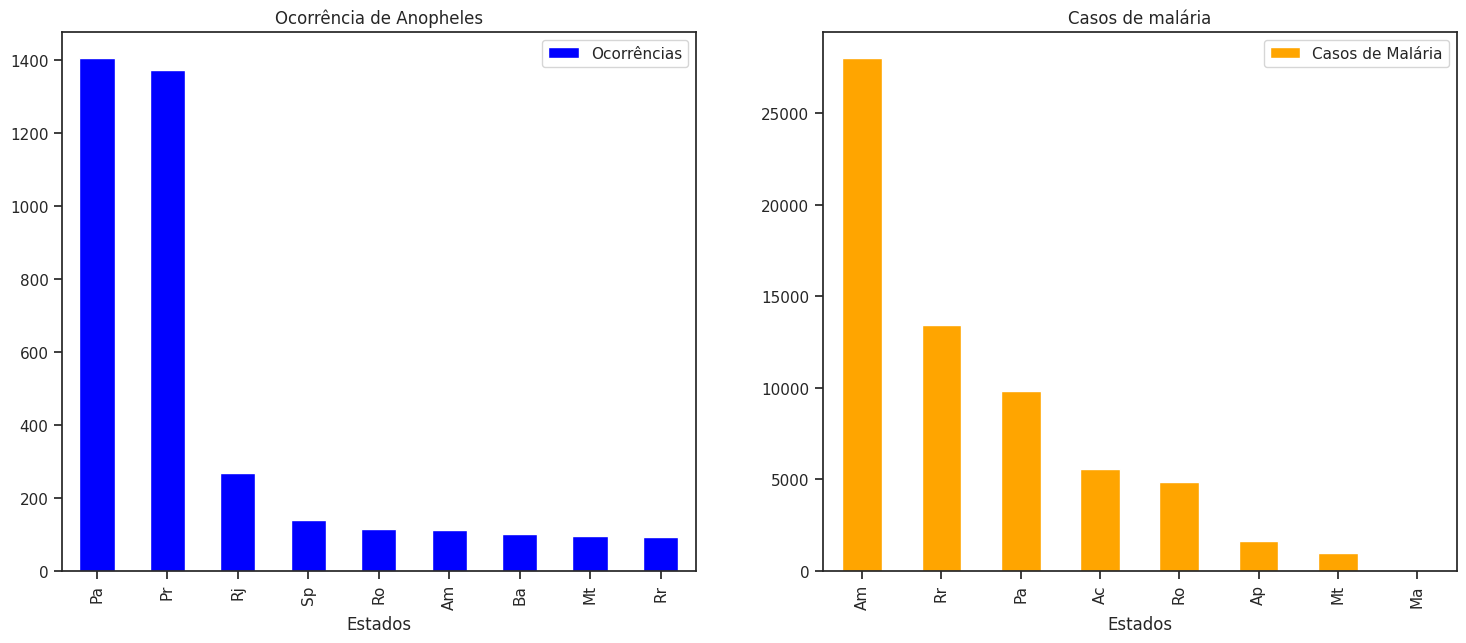

In [129]:
#Comparação por gráficos de barras de ocorrência de Anopheles com Casos de malária no Brasil
j, ax = plt.subplots(1,2, figsize=(18,7))

state_count_des[:9].plot(kind = 'bar', y = 'Ocorrências', ax=ax[0], color = 'blue', title = "Ocorrência de Anopheles")

boletimDF.plot(kind = 'bar', x = 'Estados', y = 'Casos de Malária', ax=ax[1], color = 'orange', title = "Casos de malária")

In [130]:
#Verificação das ocorrências por cada ano de registo
anophelesDF["year"].value_counts()


year
1996    686
2006    644
1995    593
2010    435
1974    355
2008    313
2009    252
2013    245
1993    219
1976    205
1991    192
2014    169
2011    164
2005    160
2017    154
2012    141
1992    140
1997    115
2007    104
1972     93
1975     72
1998     69
2018     65
2015     47
2002     46
1989     30
1990     25
1986     18
1994     17
1970     14
2001     12
1987      9
1983      8
1979      6
1988      6
2016      6
1999      5
1984      4
1982      3
1978      3
1971      3
1981      1
1977      1
Name: count, dtype: int64

<ipython-input-131-39f181ef9160>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(


Text(0.5, 12.44444444444443, 'Ano')

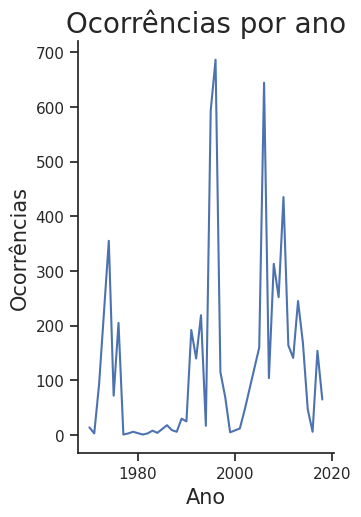

In [131]:
#Realização de um gráfico de número de ocorrências registadas no Brasil por ano
#Criar uma data frame com as colunas Ano e Contagem de ocorrências
year_count = pd.DataFrame(anophelesDF.groupby('year').size(), columns = ['Count'])

sns.set_theme(style = "ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=year_count,
    x="year", y="Count",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)
#Adicionar título
plt.title("Ocorrências por ano no gbif", fontsize=20)
#Nomear eixos
plt.ylabel("Ocorrências", fontsize=15)
plt.xlabel("Ano", fontsize=15)

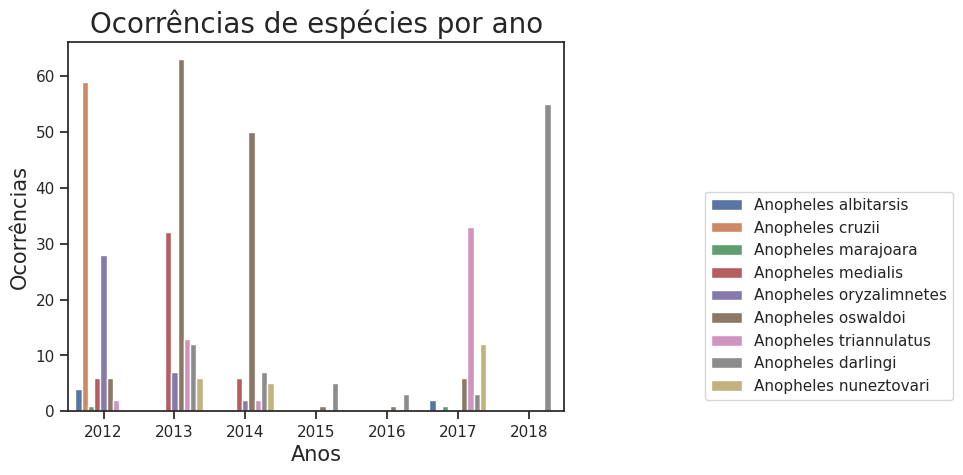

In [132]:
#Realização de um gráfico que permite visualizar quais foram as espécies com mais ocorrências por ano no Brasil

#Criar um data frame com as colunas de ano e espécies, obtendo uma coluna nova de contagem (coluna 0)
especies_ano = pd.DataFrame(anophelesDF.groupby(["year", "species"]).size().reset_index())

#Renomear a coluna 0 para Counts (Número de ocorrências)
especies_ano.rename(columns={0:"Counts"}, inplace=True)

#Encontrar as 10 especies mais frequentes no DataFrame
most_freq_spec = anophelesDF["species"].value_counts().head(10).index.tolist()

#Ordenar as especies encontradas por ano
df_sorted = especies_ano.sort_values(by='year', ascending=False)

#Remover anos duplicados mantendo apenas os 7 anos mais recentes
df_top_years = df_sorted.drop_duplicates(subset='year').head(7)
top_years = df_top_years['year'].tolist()

#Incluir apenas os 7 anos mais recentes e as 10 especies mais frequentes
df_filtered = especies_ano[especies_ano['year'].isin(top_years) & especies_ano["species"].isin(most_freq_spec)]


#Gráfico de barras de contagem de espécies por ano no Brasil
sns.barplot(x= "year", y="Counts", hue= "species", data=df_filtered)
#Adicionar título
plt.title("Ocorrências de espécies por ano no gbif", fontsize=20)
#Nomear eixos X e Y
plt.ylabel("Ocorrências", fontsize=15)
plt.xlabel("Anos", fontsize=15)
#Posicionamento da legenda
plt.legend(loc="lower right", bbox_to_anchor=(1.8,0.01))


In [133]:
#Retorna uma tabela cruzada das espécies de Anopheles por ano
especies_ano_crosstab = pd.crosstab(anophelesDF['year'], anophelesDF['species'])
esptransp= pd.DataFrame(especies_ano_crosstab.transpose())
esptransp

year                       1970  1971  1972  1974  1975  1976  1977  1978  \
species                                                                     
Anopheles albertoi            0     0     0     0     0     0     0     0   
Anopheles albimanus           0     0     0     0     0     0     0     0   
Anopheles albitarsis          0     0     0     0     3    77     1     1   
Anopheles antunesi            0     0     0     0     4     0     0     0   
Anopheles aquasalis           0     0     7     0     7     7     0     0   
Anopheles argyritarsis        0     1    16     0     0     0     0     0   
Anopheles arthuri             0     0     0     0     0     0     0     0   
Anopheles bellator            0     0     1     0     0     0     0     0   
Anopheles benarrochi          0     0     0     0     0     0     0     0   
Anopheles braziliensis        0     0     0     0     0     0     0     0   
Anopheles costai              0     0     0     0     0     0     0     0   
Anopheles cruzii              0     0     0     0     5     1     0     0   
Anopheles darlingi            0     1     0     0     0     0     0     1   
Anopheles deaneorum           0     0     0     0     0     0     0     0   
Anopheles dunhami             0     0     0     0     0     0     0     0   
Anopheles eiseni              0     0     0     2     0     0     0     0   
Anopheles evansae             0     0    11     0    11    11     0     0   
Anopheles fluminensis         0     0     0     0     0     0     0     0   
Anopheles forattinii          0     0     0     0     0     0     0     0   
Anopheles galvaoi             0     0     0     0     0     0     0     0   
Anopheles gambiae             0     0    12     0     0     0     0     0   
Anopheles goeldii             0     0     0     0     0     0     0     0   
Anopheles guarani             0     0     0     0     0     0     0     0   
Anopheles halophylus          0     0     0     0     0     0     0     0   
Anopheles homunculus          0     0     0     0     0     0     0     0   
Anopheles ininii              0     0     0    80     0     9     0     0   
Anopheles intermedius         2     0     0     2     0     0     0     0   
Anopheles janconnae           0     0     0     0     0     0     0     0   
Anopheles kompi               0     0     0     0     0     0     0     0   
Anopheles konderi             0     0     0     0     0     0     0     0   
Anopheles laneanus            0     0     0     0     0     0     0     0   
Anopheles lanei               0     0     0     0     0     0     0     0   
Anopheles lepidotus           0     0     0     0     0     0     0     0   
Anopheles lutzii              0     0     0     0     0     0     0     0   
Anopheles malefactor          0     0     0     0     0     0     0     0   
Anopheles marajoara           0     0     0     0     0     0     0     0   
Anopheles mattogrossensis     0     0     0     0     0     0     0     0   
Anopheles medialis            0     0     0     0     0     0     0     0   
Anopheles mediopunctatus      2     0     0     2     0     0     0     0   
Anopheles minor               0     0     0     0     0     0     0     0   
Anopheles neivai              0     0     0     0     0     0     0     0   
Anopheles nuneztovari         2     0     0    99     0    14     0     0   
Anopheles oryzalimnetes       0     0     0     0     0     0     0     0   
Anopheles oswaldoi            0     0     1    17     0    10     0     0   
Anopheles parvus              0     0     1     0     0     0     0     0   
Anopheles peryassui           0     0     5     0     0     0     0     0   
Anopheles pristinus           0     0     0     0     0     0     0     0   
Anopheles rangeli             0     0     0     0     0     0     0     0   
Anopheles rondoni             0     1     0     0     0     0     0     0   
Anopheles sawyeri             0     0     0     0     0     0     0     0

In [134]:
#Função para pesquisar que espécies de Anopheles ocorreram num ano específico
def crosstabs(ano):
  print(esptransp[ano].loc[esptransp[ano]>0])

crosstabs(2017)

species
Anopheles albitarsis          2
Anopheles benarrochi         10
Anopheles costai             17
Anopheles darlingi            3
Anopheles fluminensis         1
Anopheles forattinii          4
Anopheles goeldii             3
Anopheles konderi             2
Anopheles malefactor          3
Anopheles marajoara           1
Anopheles mattogrossensis     1
Anopheles nuneztovari        12
Anopheles oswaldoi            6
Anopheles peryassui           8
Anopheles tadei               3
Anopheles triannulatus       33
Name: 2017, dtype: int64


In [135]:
#Ir buscar ficheiro com coordenadas dos estados do Brasil
#ficheiro obtido em: https://gadm.org/
with open('/content/drive/MyDrive/python/gadm41_BRA_1 (1).json') as f:
    gj = geojson.load(f)

In [136]:
#Verificação do ficheiro anterior em formato dicionário
gj

{"crs": {"properties": {"name": "urn:ogc:def:crs:OGC:1.3:CRS84"}, "type": "name"}, "features": [{"geometry": {"coordinates": [[[[-68.4033, -11.0535], [-68.4085, -11.0517], [-68.4094, -11.0468], [-68.416, -11.0408], [-68.4237, -11.0419], [-68.429, -11.0356], [-68.4363, -11.0363], [-68.4458, -11.0463], [-68.4883, -11.0509], [-68.5057, -11.0649], [-68.5078, -11.0727], [-68.5198, -11.0884], [-68.5429, -11.0996], [-68.5435, -11.1104], [-68.7168, -11.1452], [-68.7119, -11.1297], [-68.7232, -11.1146], [-68.7219, -11.1039], [-68.7355, -11.0936], [-68.7424, -11.0972], [-68.7465, -11.0956], [-68.7521, -11.086], [-68.7584, -11.0841], [-68.7568, -11.0767], [-68.7661, -11.0665], [-68.7604, -11.0564], [-68.7672, -11.0494], [-68.7602, -11.0394], [-68.752, -11.0373], [-68.7489, -11.0109], [-68.7556, -11.0119], [-68.7631, -11.0195], [-68.7638, -11.0131], [-68.7578, -11.0099], [-68.7584, -11.0036], [-68.763, -11.0036], [-68.771, -11.0083], [-68.7803, -11.0055], [-68.7793, -11.0004], [-68.782, -10.9998],

In [137]:
#Criação de um mapa com as divisórias de estados brasileiros com a localizações das ocorrências
#Coordenadas e Zooms iniciais do mapa
m = folium.Map([-15, -60], zoom_start=4)
#Delinear os estados com o GeoJson
folium.GeoJson(gj).add_to(m)
#Adicionar marcadores agrupados com as coordenadas de cada ocorrência
mc1 = MarkerCluster()
for idx, row in anophelesDF.iterrows():
  if not math.isnan(row['decimalLongitude']) and not math.isnan(row['decimalLatitude']):
    mc1.add_child(Marker([row['decimalLatitude'], row['decimalLongitude']]))
m.add_child(mc1)

m


<ipython-input-138-0701d7b22266>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=anophelesDF['decimalLongitude'], y=anophelesDF['decimalLatitude'], cmap='pink', shade=True)


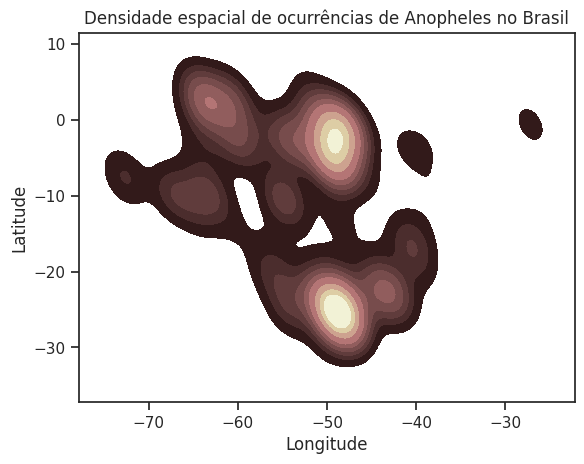

In [138]:
#Mapa de calor de ocorrências no Brasil

sns.kdeplot(x=anophelesDF['decimalLongitude'], y=anophelesDF['decimalLatitude'], cmap='pink', shade=True)

#Adicionar titulo
plt.title('Densidade espacial de ocurrências de Anopheles no Brasil')
#Nomear eixos
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#Mostrar o gráfico
plt.show()

In [139]:
Entrez.email = "exemplo@email.com"

In [140]:
def obter_informacoes_taxonomicas(especies):
    informacoes_taxonomicas = {}
    for especie in especies:
        try:
            # Pesquisa pelo termo (nome da espécie)
            search_handle = Entrez.esearch(db="taxonomy", term=especie, retmode="xml")
            search_results = Entrez.read(search_handle)
            #search_handle.close()

            # Obtém o ID taxonômico da primeira entrada
            taxon_id = search_results["IdList"][0]

            # Obtém as informações taxonômicas
            fetch_handle = Entrez.efetch(db="taxonomy", id=taxon_id, retmode="xml")
            taxon_info = Entrez.read(fetch_handle)
            #fetch_handle.close()

            # Armazena as informações num dicionário
            informacoes_taxonomicas[especie] = taxon_info[0]
        except Exception as e:
            print(f"Erro ao obter informações para a espécie {especie}: {e}")

    return informacoes_taxonomicas

# Lista de espécies de exemplo
especies = []

for x in anophelesDF['species'].unique(): # filtrar o nan
  if x is np.NaN:
    pass
  else:
    especies.append(x)

# Obtém as informações taxonômicas
informacoes_taxonomicas = obter_informacoes_taxonomicas(especies)

# Exibe as informações obtidas
for especie, info in informacoes_taxonomicas.items():
    print(f"Informações taxonômicas para {especie}:")
    print(info)
    print()

Erro ao obter informações para a espécie Anopheles goeldii: HTTP Error 400: Bad Request
Erro ao obter informações para a espécie Anopheles thomasi: list index out of range
Informações taxonômicas para Anopheles tadei:
{'TaxId': '2847163', 'ScientificName': 'Anopheles tadei', 'OtherNames': {'Synonym': [], 'Inpart': [], 'GenbankAnamorph': [], 'Misspelling': [], 'Name': [{'ClassCDE': 'authority', 'DispName': 'Anopheles tadei Saraiva & Scarpassa, 2021'}], 'Anamorph': [], 'Includes': ['Anopheles (Nyssorhynchus) sp. 1 JFS-2021a'], 'EquivalentName': [], 'Acronym': [], 'GenbankSynonym': [], 'Misnomer': [], 'CommonName': [], 'Teleomorph': []}, 'ParentTaxId': '44543', 'Rank': 'species', 'Division': 'Invertebrates', 'GeneticCode': {'GCId': '1', 'GCName': 'Standard'}, 'MitoGeneticCode': {'MGCId': '5', 'MGCName': 'Invertebrate Mitochondrial'}, 'Lineage': 'cellular organisms; Eukaryota; Opisthokonta; Metazoa; Eumetazoa; Bilateria; Protostomia; Ecdysozoa; Panarthropoda; Arthropoda; Mandibulata; Pancr

Tabela-Resumo das especies e seu ID

In [141]:
def obter_informacoes_taxonomicas(especies):
    dados_taxonomicos = []
    for especie in especies:
        try:
            # Pesquisa pelo termo (nome da espécie)
            search_handle = Entrez.esearch(db="taxonomy", term=especie, retmode="xml")
            search_results = Entrez.read(search_handle)
            search_handle.close()

            # Verifica se há resultados
            if not search_results["IdList"]:
                print(f"Nenhum resultado encontrado para a espécie {especie}")
                continue

            # Obtém o ID taxonômico da primeira entrada
            taxon_id = search_results["IdList"][0]

            # Adiciona o nome da espécie e o taxonID à lista de dados
            dados_taxonomicos.append({'Especie': especie, 'TaxonID': taxon_id})

        except Exception as e:
            print(f"Erro ao obter informações para a espécie {especie}: {e}")

    return dados_taxonomicos

# Obtém as informações taxonômicas
dados_taxonomicos = obter_informacoes_taxonomicas(especies)

# Cria um DataFrame a partir dos dados taxonômicos
df_taxonomico = pd.DataFrame(dados_taxonomicos)

# Exibe a tabela
print(df_taxonomico)

# Opcional: Salvar a tabela em um arquivo CSV
df_taxonomico.to_csv('informacoes_taxonomicas.csv', index=False)


Nenhum resultado encontrado para a espécie Anopheles thomasi
                      Especie  TaxonID
0             Anopheles tadei  2847163
1           Anopheles konderi    43180
2          Anopheles darlingi    43151
3        Anopheles benarrochi    43061
4            Anopheles costai   925981
5       Anopheles fluminensis   364273
6      Anopheles triannulatus    58253
7   Anopheles mattogrossensis   139049
8          Anopheles oswaldoi    43181
9        Anopheles forattinii  1426903
10        Anopheles peryassui   184770
11       Anopheles malefactor  1043304
12       Anopheles albitarsis    58236
13          Anopheles goeldii   585440
14        Anopheles marajoara    58244
15      Anopheles nuneztovari    30067
16         Anopheles medialis  2803201
17    Anopheles oryzalimnetes    58237
18           Anopheles neivai   139046
19     Anopheles argyritarsis    58241
20          Anopheles sawyeri  1552952
21     Anopheles braziliensis    58242
22        Anopheles lepidotus  1108002
23 

Pesquisa no motor de buscas NCBI

 Esta imagem é representativa da pesquisa realizada no site NCBI do género de Anopheles


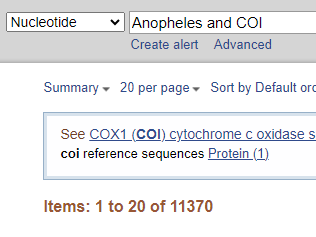

In [142]:
#Imagem representativa
from IPython.display import Image
print(f" Esta imagem é representativa da pesquisa realizada no site NCBI do género de Anopheles")
Image(filename='/content/drive/MyDrive/python/img2.PNG')


In [143]:
#Pesquisar as sequências totais para Anopheles no NCBI
# Alterar de proteina para nucleótido para corresponder o ID
searchResultHandle = Entrez.esearch(db="nucleotide", term="Anopheles AND COI", retmax=1000)
searchResult = Entrez.read(searchResultHandle)
#Contagem de sequências totais
searchResult["Count"]
print(f"Na base de dados NCBI existem {searchResult['Count']} sequências de COI para Anopheles.")

Na base de dados NCBI existem 11370 sequências de COI para Anopheles.


In [144]:
#Selecionar a espécie para pesquisar
dropdown = 'Anopheles nuneztovari' # @param ['Anopheles', 'Anopheles tadei', 'Anopheles konderi', 'Anopheles darlingi', 'Anopheles benarrochi', 'Anopheles costai','Anopheles fluminensis', 'Anopheles triannulatus', 'Anopheles mattogrossensis', 'Anopheles oswaldoi', 'Anopheles forattinii', 'Anopheles peryassui', 'Anopheles malefactor', 'Anopheles albitarsis','Anopheles goeldii', 'Anopheles marajoara', 'Anopheles nuneztovari', 'Anopheles thomasi', 'Anopheles medialis']
#Adicionar o "and coi"
pesquisar=[dropdown + " AND COI"]

In [145]:
pesquisar

['Anopheles nuneztovari AND COI']

Como pesquisar por 'termo = Anophleles AND COI' no motor de busca NCBI resultados filtrados

In [146]:
#Pesquisar apenas uma espécie presente no Brasil
for x in pesquisar:
  termo = x
  searchResultHandle = Entrez.esearch(db="nucleotide", term= termo, retmax=1000)
  searchResult = Entrez.read(searchResultHandle)
  searchResult["Count"]
  print(f"Na base de dados NCBI existem {searchResult['Count']} sequências de COI para {termo}.")

Na base de dados NCBI existem 357 sequências de COI para Anopheles nuneztovari AND COI.
